In [11]:
# Importing necessary libraries

# pandas: A powerful data manipulation library for loading and handling data in tabular format (DataFrames)
import pandas as pd

# numpy: A fundamental package for numerical computations, handling arrays and matrices, and performing mathematical operations
import numpy as np

# matplotlib.pyplot: A popular library for creating static, animated, and interactive visualizations (used for plotting graphs)
import matplotlib.pyplot as plt

# train_test_split: A function from sklearn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# StandardScaler: A tool from sklearn for scaling features to have a mean of 0 and a standard deviation of 1 (important for LSTM models)
from sklearn.preprocessing import StandardScaler

# accuracy_score: A metric from sklearn to calculate the accuracy of predictions made by the model
from sklearn.metrics import accuracy_score

# tensorflow: An open-source machine learning framework for building and training neural networks
import tensorflow as tf

# Sequential: A model type from TensorFlow's Keras API, allowing us to create models layer by layer (used for neural networks)
from tensorflow.keras.models import Sequential

# LSTM: A type of recurrent neural network (RNN) layer, specifically designed to learn from sequences and time series data
from tensorflow.keras.layers import LSTM

# Dense: A fully connected neural network layer, where each neuron in the layer is connected to every neuron in the previous layer
from tensorflow.keras.layers import Dense

# Dropout: A regularization technique to prevent overfitting by randomly "dropping out" (ignoring) a set of neurons during training
from tensorflow.keras.layers import Dropout

# to_categorical: A utility function to convert integer labels (e.g., 0 or 1) into one-hot encoded format (important for classification tasks)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input


In [3]:
# Step 1: Load the dataset
data = pd.read_csv("C:\\Users\\Local User\\Desktop\\python_2308\\data mining\\heart.csv")

# Step 2: Preprocessing the data
# Checking the first few rows of the dataset to understand its structure
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [35]:
# Separating features (X) and target (y)
# Assuming the target column is 'target' and indicates whether the patient has heart disease
X = data.drop('target', axis=1)  # Dropping the target column to get features
y = data['target']  # This is the target column

In [36]:
# Step 3: Train-test split
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Step 4: Feature scaling (normalization)
# Scaling the features to a standard range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Reshaping data to be compatible with LSTM input [samples, time steps, features]
# Here we set time steps as 1 since we are not using sequential data
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [39]:
# Step 5: Convert target to categorical (for classification)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [43]:
# Step 6: Building the LSTM model
model = Sequential()

In [44]:
# Adding an LSTM layer with 100 units, input shape is (time steps, features)
# Since time steps = 1 and features = 13 (depending on your dataset), this specifies the input shape.
model.add(LSTM(100, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))

In [45]:
# Adding a dropout layer to prevent overfitting
model.add(Dropout(0.2))

In [46]:
# Adding a Dense output layer with 2 units (since we have two classes) and softmax activation
model.add(Dense(2, activation='softmax'))

In [47]:
# Step 7: Compile the model
# Using categorical crossentropy for a multi-class classification problem
# Optimizer: Adam, which is generally good for LSTM models
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Step 8: Train the model
# Training for 50 epochs and a batch size of 32
history = model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_cat))

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7266 - loss: 0.6403 - val_accuracy: 0.7659 - val_loss: 0.5378
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8452 - loss: 0.4833 - val_accuracy: 0.7854 - val_loss: 0.4559
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3990 - val_accuracy: 0.8000 - val_loss: 0.4238
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8471 - loss: 0.3626 - val_accuracy: 0.8049 - val_loss: 0.4166
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8689 - loss: 0.3385 - val_accuracy: 0.8049 - val_loss: 0.4162
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8729 - loss: 0.3339 - val_accuracy: 0.8098 - val_loss: 0.4110
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8863 - loss: 0.3061 - val_accuracy: 0.8000 - val_loss: 0.4125
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8962 - loss: 0.2758 - val_accuracy: 0.8049 - val_loss

In [49]:
# Step 9: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8905 - loss: 0.2410 
Test Accuracy: 89.76%


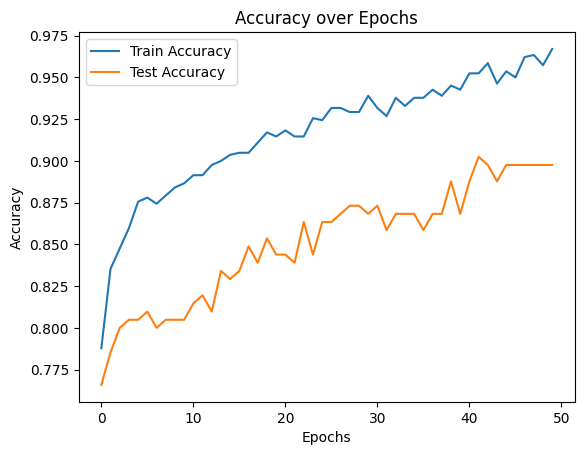

In [50]:
# Step 10: Plotting accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# After training the model, use this part to take dynamic user input
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create an input array based on the values provided
    new_input = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Step 1: Scale the new input using the same scaler used on the training data
    new_input_scaled = scaler.transform(new_input)

    # Step 2: Reshape the input to match the LSTM's expected input shape (samples, time steps, features)
    new_input_scaled = new_input_scaled.reshape((new_input_scaled.shape[0], 1, new_input_scaled.shape[1]))

    # Step 3: Use the model to predict the outcome
    prediction = model.predict(new_input_scaled)

    # Step 4: Get the predicted class (0 or 1) by choosing the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)

    # Print the result
    if predicted_class[0] == 0:
        return "Prediction: No Heart Disease"
    else:
        return "Prediction: Heart Disease"

# Step 7: Taking user input
age = float(input("Enter age: "))
sex = int(input("Enter sex (1 = male, 0 = female): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure (in mm Hg): "))
chol = float(input("Enter serum cholesterol in mg/dl: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect): "))

# Call the prediction function with user input
result = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
print(result)


Enter age:  65
Enter sex (1 = male, 0 = female):  1
Enter chest pain type (0-3):  1
Enter resting blood pressure (in mm Hg):  110
Enter serum cholesterol in mg/dl:  203
Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false):  1
Enter resting electrocardiographic results (0-2):  0
Enter maximum heart rate achieved:  1
Enter exercise induced angina (1 = yes, 0 = no):  1
Enter ST depression induced by exercise relative to rest:  3.1
Enter slope of the peak exercise ST segment (0-2):  1
Enter number of major vessels (0-3) colored by fluoroscopy:  0
Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: No Heart Disease


C:\Users\Local User\desktop\python_2308\my_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
